#load dataset

In [1]:
import os
import urllib.request
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [2]:
# Create data folder if not exists
if not os.path.exists("data"):
    os.makedirs("data")

# Download dataset from github (easier)
train_url = "https://github.com/defcom17/NSL_KDD/raw/master/KDDTrain+.txt"
test_url = "https://github.com/defcom17/NSL_KDD/raw/master/KDDTest+.txt"

#traning
urllib.request.urlretrieve(train_url, "data/KDDTrain+.txt")

# testing
urllib.request.urlretrieve(test_url, "data/KDDTest+.txt")

print("Done")


Done


 Data Exploration

In [3]:
train_df = pd.read_csv("data/KDDTrain+.txt", header=None)
test_df = pd.read_csv("data/KDDTest+.txt", header=None)

print(" Train shape:", train_df.shape)
print(" Test shape:", test_df.shape)



 Train shape: (125973, 43)
 Test shape: (22544, 43)


In [4]:
train_df.head()

,0,1,2,3,4,5,6,7,8,9,...,33,34,35,36,37,38,39,40,41,42
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


we can see that there is no  column names, so we will add them

In [5]:
# Check missing values
print("Missing values per column (train):")
print(train_df.isnull().sum())

print("\nMissing values per column (test):")
print(test_df.isnull().sum())

# Check total missing values
print("\nTotal missing values (train):", train_df.isnull().sum().sum())
print("Total missing values (test):", test_df.isnull().sum().sum())

#  Check duplicated rows
print("\nDuplicated rows (train):", train_df.duplicated().sum())
print("Duplicated rows (test):", test_df.duplicated().sum())


Missing values per column (train):
0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    0
33    0
34    0
35    0
36    0
37    0
38    0
39    0
40    0
41    0
42    0
dtype: int64

Missing values per column (test):
0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    0
33    0
34    0
35    0
36    0
37    0
38    0
39    0
40    0
41    0
42    0
dtype: int64

Total missing values (train): 0
Total missing values (test): 0

Duplicated rows (train): 0
Duplicated rows (test): 0


The NSL-KDD dataset is an educational dataset, so it is already clean. We checked for missing values and duplicates, and none were significant. No additional cleaning was required.

In [6]:
train_labels = train_df.iloc[:, 41]

print(" Unique labels:", train_labels.nunique())
print(train_labels.value_counts().head(10))


 Unique labels: 23
41
normal         67343
neptune        41214
satan           3633
ipsweep         3599
portsweep       2931
smurf           2646
nmap            1493
back             956
teardrop         892
warezclient      890
Name: count, dtype: int64


The dataset has 23 different labels. One label is “normal”, and the rest are different attack types.\

In [7]:
normal_count = (train_labels == "normal").sum()
attack_count = (train_labels != "normal").sum()

print("Normal:", normal_count)
print("Attack:", attack_count)

Normal: 67343
Attack: 58630


#Data Transformations

since the column does not have a name

In [8]:
# add the column labels
columns = (['duration'
,'protocol_type'
,'service'
,'flag'
,'src_bytes'
,'dst_bytes'
,'land'
,'wrong_fragment'
,'urgent'
,'hot'
,'num_failed_logins'
,'logged_in'
,'num_compromised'
,'root_shell'
,'su_attempted'
,'num_root'
,'num_file_creations'
,'num_shells'
,'num_access_files'
,'num_outbound_cmds'
,'is_host_login'
,'is_guest_login'
,'count'
,'srv_count'
,'serror_rate'
,'srv_serror_rate'
,'rerror_rate'
,'srv_rerror_rate'
,'same_srv_rate'
,'diff_srv_rate'
,'srv_diff_host_rate'
,'dst_host_count'
,'dst_host_srv_count'
,'dst_host_same_srv_rate'
,'dst_host_diff_srv_rate'
,'dst_host_same_src_port_rate'
,'dst_host_srv_diff_host_rate'
,'dst_host_serror_rate'
,'dst_host_srv_serror_rate'
,'dst_host_rerror_rate'
,'dst_host_srv_rerror_rate'
,'attack'
,'level'])

train_df.columns = columns
test_df.columns = columns


train_df.head()


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


We will convert the attack labels into a binary format

if the label is "normal", we assign 1, otherwise 0

This prepares the data for binary classification (normal vs attack)



In [9]:
train_df["binary_label"] = (train_df["attack"] == "normal").astype(int)
test_df["binary_label"] = (test_df["attack"] == "normal").astype(int)


train_df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level,binary_label
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20,1
1,0,udp,other,SF,146,0,0,0,0,0,...,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15,1
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19,0
3,0,tcp,http,SF,232,8153,0,0,0,0,...,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21,1
4,0,tcp,http,SF,199,420,0,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21,1


now we have in the dataset 3 coulmn that are categorical (protocol_type,service,flag) so we will encoded using LabelEncoder


This converts text values into numeric values so the model can process them.

In [10]:
encoder = LabelEncoder()

# Apply encoding only on the 3 categorical columns
categorical_cols = ["protocol_type", "service", "flag"]

for col in categorical_cols:
    # Combine train+test to avoid unseen labels error
    combined = pd.concat([train_df[col], test_df[col]])

    encoder.fit(combined)

    train_df[col] = encoder.transform(train_df[col])
    test_df[col] = encoder.transform(test_df[col])


#Exploratory Data Analysis (EDA)

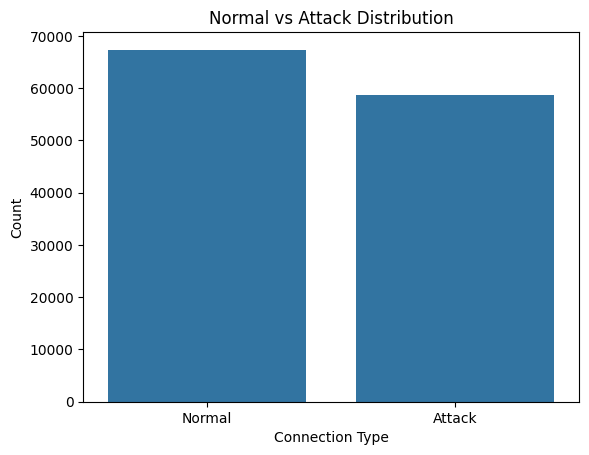

In [11]:
# Create a text version of the binary label for plotting
train_df["label_text"] = train_df["binary_label"].map({1: "Normal", 0: "Attack"})

sns.countplot(data=train_df, x="label_text")
plt.title("Normal vs Attack Distribution")
plt.xlabel("Connection Type")
plt.ylabel("Count")
plt.show()



The plot compares how many records are normal vs attacks. The dataset is nearly balanced


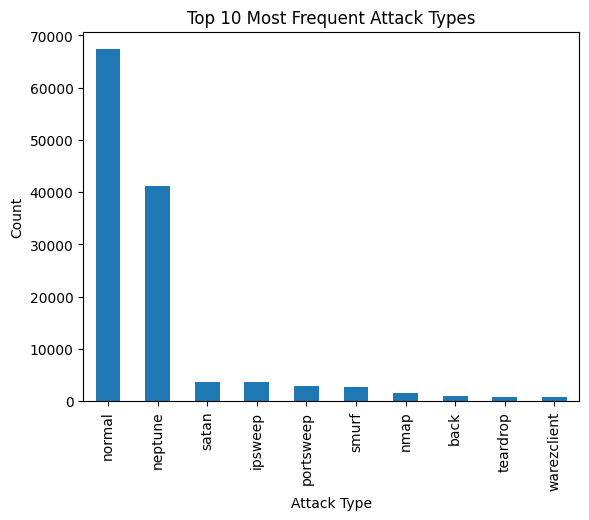

In [12]:
train_df['attack'].value_counts().head(10).plot(kind='bar')
plt.title("Top 10 Most Frequent Attack Types")
plt.xlabel("Attack Type")
plt.ylabel("Count")
plt.show()


# Model

start by selcet X and Y

In [13]:
# Select feature columns: use all numeric features except labels and helper columns
feature_cols = [
    col for col in train_df.columns
    if col not in ["attack", "level", "binary_label", "label_text"]
]

X_train = train_df[feature_cols]
y_train = train_df["binary_label"]

X_test = test_df[feature_cols]
y_test = test_df["binary_label"]

print("Number of features used in the baseline model:", len(feature_cols))


Number of features used in the baseline model: 41


this is the model ( we can change these numbers (hyperparameter)  to optimize the model )

In [14]:
baseline_model = RandomForestClassifier(
    n_estimators=100,      # number of trees
    max_depth=8,           # max depth of each tree
    min_samples_split=10,  # don't split unless >= 10 samples
    min_samples_leaf=4,    # leaf must have >= 4 samples
    random_state=42,       # reproducible results
    n_jobs=-1              # use all CPU cores
)

baseline_model.fit(X_train, y_train)
print("Baseline model training completed.")
print("Train:", baseline_model.score(X_train, y_train))
print("Test:", baseline_model.score(X_test, y_test))



Baseline model training completed.
Train: 0.9948163495352179
Test: 0.7682310149041873


In [15]:
baseline_model = RandomForestClassifier(
    n_estimators=50,
    max_depth=5,          # قللنا العمق أكثر
    min_samples_split=20,
    min_samples_leaf=10,
    class_weight='balanced',  # مهم جداً لبيانات هجمات
    random_state=42,
    n_jobs=-1
)

baseline_model.fit(X_train, y_train)
print("Train:", baseline_model.score(X_train, y_train))
print("Test:", baseline_model.score(X_test, y_test))


Train: 0.9868146348820779
Test: 0.7847320794889993


In [16]:
# Make predictions on the test set
y_pred_baseline = baseline_model.predict(X_test)

# Accuracy
baseline_accuracy = accuracy_score(y_test, y_pred_baseline)
print(f"\nBaseline Accuracy: {baseline_accuracy:.4f} ({baseline_accuracy * 100:.2f}%)")

# Classification report
print("\nBaseline Classification Report:")
print(classification_report(y_test, y_pred_baseline, target_names=["Attack", "Normal"]))

# Confusion matrix
print("Baseline Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_baseline))



Baseline Accuracy: 0.7847 (78.47%)

Baseline Classification Report:
              precision    recall  f1-score   support

      Attack       0.97      0.64      0.77     12833
      Normal       0.67      0.97      0.80      9711

    accuracy                           0.78     22544
   macro avg       0.82      0.81      0.78     22544
weighted avg       0.84      0.78      0.78     22544

Baseline Confusion Matrix:
[[8254 4579]
 [ 274 9437]]


now we will start do something to optimize the model
1- remove some features
2- change the hyperparameter



Top 10 important features (baseline model):
                   feature  importance
4                src_bytes    0.245240
5                dst_bytes    0.119575
3                     flag    0.070892
11               logged_in    0.065021
28           same_srv_rate    0.061136
29           diff_srv_rate    0.051702
32      dst_host_srv_count    0.051450
33  dst_host_same_srv_rate    0.045964
24             serror_rate    0.038081
1            protocol_type    0.035764


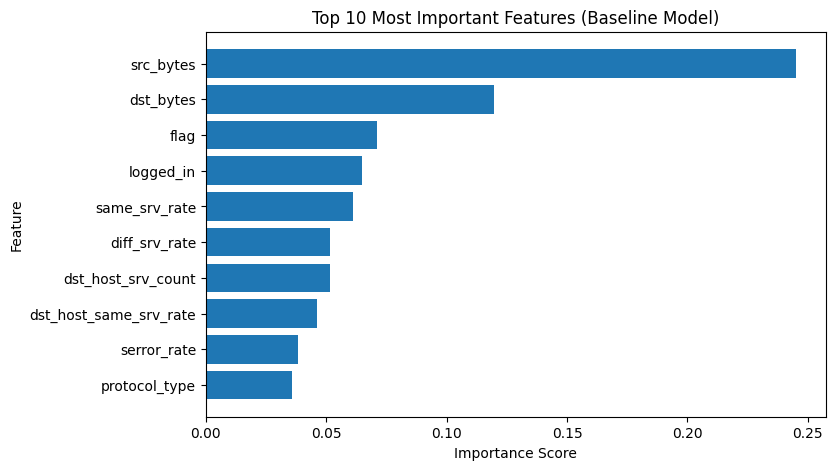

In [17]:
# Get feature importance scores from the baseline model
importance_scores = baseline_model.feature_importances_

# Create a DataFrame to store scores with feature names
feat_importance = pd.DataFrame({
    "feature": feature_cols,
    "importance": importance_scores
})

# Sort by importance (highest first)
feat_importance = feat_importance.sort_values(by="importance", ascending=False)

# Display top 10 important features
print("\nTop 10 important features (baseline model):")
print(feat_importance.head(10))

# Plot the top 10 features
plt.figure(figsize=(8, 5))
plt.barh(feat_importance.head(10)["feature"], feat_importance.head(10)["importance"])
plt.gca().invert_yaxis()  # highest at the top
plt.title("Top 10 Most Important Features (Baseline Model)")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()



we will remove these features

In [18]:
# Features to remove (low-importance or almost constant features)
remove_features = ["num_outbound_cmds", "is_host_login", "urgent", "land"]

# Create optimized copies of the data
train_df_opt = train_df.drop(columns=remove_features).copy()
test_df_opt = test_df.drop(columns=remove_features).copy()

# Define feature columns for the optimized model
feature_cols_opt = [
    col for col in train_df_opt.columns
    if col not in ["attack", "level", "binary_label", "label_text"]
]

print("\nRemoved features:", remove_features)
print("Number of features after selection:", len(feature_cols_opt))



Removed features: ['num_outbound_cmds', 'is_host_login', 'urgent', 'land']
Number of features after selection: 37


Build X and y for the optimized model

In [19]:
X_train_opt = train_df_opt[feature_cols_opt]
y_train_opt = train_df_opt["binary_label"]

X_test_opt = test_df_opt[feature_cols_opt]
y_test_opt = test_df_opt["binary_label"]

# Train the optimized Random Forest model
optimized_model = RandomForestClassifier(
    n_estimators=20,   # you can increase this later
    max_depth=12,       # same depth as baseline
    random_state=42,
    n_jobs=-1
)

optimized_model.fit(X_train_opt, y_train_opt)
print("Optimized model training completed.")


Optimized model training completed.


In [20]:
# Make predictions with the optimized model
y_pred_opt = optimized_model.predict(X_test_opt)

# Accuracy
opt_accuracy = accuracy_score(y_test_opt, y_pred_opt)
print(f"\nOptimized Accuracy: {opt_accuracy:.4f} ({opt_accuracy * 100:.2f}%)")

# Classification report
print("\nOptimized Classification Report:")
print(classification_report(y_test_opt, y_pred_opt, target_names=["Attack", "Normal"]))

# Confusion matrix
print("Optimized Confusion Matrix:")
print(confusion_matrix(y_test_opt, y_pred_opt))


Optimized Accuracy: 0.7870 (78.70%)

Optimized Classification Report:
              precision    recall  f1-score   support

      Attack       0.97      0.65      0.78     12833
      Normal       0.68      0.97      0.80      9711

    accuracy                           0.79     22544
   macro avg       0.82      0.81      0.79     22544
weighted avg       0.84      0.79      0.79     22544

Optimized Confusion Matrix:
[[8313 4520]
 [ 281 9430]]


Maybe we have to change the model ??

#XGBoost

In [21]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score


feature_cols_xgb = [
    col for col in train_df.columns
    if col not in ["attack", "level", "binary_label", "label_text"]
]

X_train_xgb = train_df[feature_cols_xgb]
y_train_xgb = train_df["binary_label"]

X_test_xgb = test_df[feature_cols_xgb]
y_test_xgb = test_df["binary_label"]

print("Number of features used in XGBoost:", len(feature_cols_xgb))

xgb_model = XGBClassifier(
    n_estimators=200,        # number of trees
    max_depth=6,             # tree depth
    learning_rate=0.1,       # step size
    subsample=0.8,           # row sampling
    colsample_bytree=0.8,    # feature sampling per tree
    objective="binary:logistic",
    eval_metric="logloss",
    n_jobs=-1,
    random_state=42
)


#  Train
xgb_model.fit(X_train_xgb, y_train_xgb)
print("XGBoost model training completed.")

# Predictions
y_pred_xgb = xgb_model.predict(X_test_xgb)
y_proba_xgb = xgb_model.predict_proba(X_test_xgb)[:, 1]


xgb_accuracy = accuracy_score(y_test_xgb, y_pred_xgb)
xgb_auc = roc_auc_score(y_test_xgb, y_proba_xgb)

print(f"\nXGBoost Accuracy: {xgb_accuracy:.4f} ({xgb_accuracy * 100:.2f}%)")
print(f"XGBoost AUC: {xgb_auc:.4f}")

print("\nXGBoost Classification Report:")
print(classification_report(y_test_xgb, y_pred_xgb, target_names=["Attack", "Normal"]))

print("XGBoost Confusion Matrix:")
print(confusion_matrix(y_test_xgb, y_pred_xgb))


Number of features used in XGBoost: 41
XGBoost model training completed.

XGBoost Accuracy: 0.8042 (80.42%)
XGBoost AUC: 0.9697

XGBoost Classification Report:
              precision    recall  f1-score   support

      Attack       0.97      0.68      0.80     12833
      Normal       0.70      0.97      0.81      9711

    accuracy                           0.80     22544
   macro avg       0.83      0.82      0.80     22544
weighted avg       0.85      0.80      0.80     22544

XGBoost Confusion Matrix:
[[8700 4133]
 [ 282 9429]]


#AutoMl

In [22]:
!pip install numpy==1.26.4 flaml --quiet


In [23]:
from flaml import AutoML
from sklearn.metrics import accuracy_score, classification_report

feature_cols = [
    col for col in train_df.columns
    if col not in ["attack", "level", "binary_label", "label_text"]
]

X_train = train_df[feature_cols]
y_train = train_df["binary_label"]

X_test  = test_df[feature_cols]
y_test  = test_df["binary_label"]

print("Number of features used by AutoML:", len(feature_cols))

automl = AutoML()

settings = {
    "time_budget": 300,
    "metric": "accuracy",
    "task": "classification",
    "log_file_name": "automl_normal_vs_attack.log",
    "verbose": 1,
}


automl.fit(X_train=X_train, y_train=y_train, **settings)

print("\n Best model found by AutoML:")
print("Best estimator:", automl.best_estimator)
print("Best config:", automl.best_config)
print("Best loss:", automl.best_loss)

y_pred_automl = automl.predict(X_test)

auto_acc = accuracy_score(y_test, y_pred_automl)
print(f"\nAutoML Accuracy (Normal vs All Attacks): {auto_acc:.4f} ({auto_acc*100:.2f}%)\n")

print("AutoML Classification Report:")
print(classification_report(y_test, y_pred_automl, target_names=["Attack", "Normal"]))





Number of features used by AutoML: 41


INFO:flaml.tune.searcher.blendsearch:No low-cost partial config given to the search algorithm. For cost-frugal search, consider providing low-cost values for cost-related hps via 'low_cost_partial_config'. More info can be found at https://microsoft.github.io/FLAML/docs/FAQ#about-low_cost_partial_config-in-tune
INFO:flaml.tune.searcher.blendsearch:No low-cost partial config given to the search algorithm. For cost-frugal search, consider providing low-cost values for cost-related hps via 'low_cost_partial_config'. More info can be found at https://microsoft.github.io/FLAML/docs/FAQ#about-low_cost_partial_config-in-tune



 Best model found by AutoML:
Best estimator: xgb_limitdepth
Best config: {'n_estimators': 71, 'max_depth': 9, 'min_child_weight': 0.565787935751541, 'learning_rate': 1.0, 'subsample': 1.0, 'colsample_bylevel': 0.7620271855357894, 'colsample_bytree': 0.6138481769580465, 'reg_alpha': 0.037223053529907714, 'reg_lambda': 0.7363013789198046}
Best loss: 0.0003968253968253954

AutoML Accuracy (Normal vs All Attacks): 0.7918 (79.18%)

AutoML Classification Report:
              precision    recall  f1-score   support

      Attack       0.97      0.66      0.78     12833
      Normal       0.68      0.97      0.80      9711

    accuracy                           0.79     22544
   macro avg       0.82      0.81      0.79     22544
weighted avg       0.84      0.79      0.79     22544



### We selected the 'neptune' attack type because it is the most frequent attack
### in the NSL-KDD dataset, making it the most important and impactful to detect.

In [24]:
# Filter the data to keep only normal and neptune connections
neptune_train = train_df[train_df['attack'].isin(['normal', 'neptune'])].copy()
neptune_test  = test_df[test_df['attack'].isin(['normal', 'neptune'])].copy()


neptune_train['label'] = neptune_train['attack'].map({'normal': 0, 'neptune': 1})
neptune_test['label']  = neptune_test['attack'].map({'normal': 0, 'neptune': 1})


final_remove_cols = ["attack", "level", "binary_label", "label_text", "num_outbound_cmds"]

X_train = neptune_train.drop(final_remove_cols + ['label'], axis=1, errors='ignore')
y_train = neptune_train['label']

X_test  = neptune_test.drop(final_remove_cols + ['label'], axis=1, errors='ignore')
y_test  = neptune_test['label']


final_rf = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    class_weight='balanced',
    n_jobs=-1
)

final_rf.fit(X_train, y_train)


y_pred = final_rf.predict(X_test)

print(f"\n Final Neptune Model Accuracy: {accuracy_score(y_test, y_pred) * 100:.2f}%\n")
print("Final Classification Report (Normal vs Neptune):")
print(classification_report(y_test, y_pred, target_names=['normal', 'neptune']))



 Final Neptune Model Accuracy: 99.90%

Final Classification Report (Normal vs Neptune):
              precision    recall  f1-score   support

      normal       1.00      1.00      1.00      9711
     neptune       1.00      1.00      1.00      4657

    accuracy                           1.00     14368
   macro avg       1.00      1.00      1.00     14368
weighted avg       1.00      1.00      1.00     14368

